In [1]:
import torch

# torch基本操作

## tensor

### 创建tensor

In [26]:
import numpy as np
a = np.array([[1,2,3],[4,5,6],[7,8,9]])
a

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [27]:
b = torch.tensor(a, dtype=torch.double)
b

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]], dtype=torch.float64)

In [28]:
x = torch.zeros(5, 3, dtype=torch.long)
x

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])

In [29]:
x = x.new_ones(5, 3, dtype=torch.double) # new_* methods take in sizes
x

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)

In [30]:
x = torch.randn_like(x, dtype=torch.float) 
# override dtype!
# result has the same size
x

tensor([[-0.2633,  2.1363,  1.5074],
        [ 2.0120, -0.0035,  0.9759],
        [-0.7954, -0.0967,  0.3718],
        [-1.5191,  0.9891, -0.6753],
        [-1.6067,  0.9154,  0.3409]])

In [31]:
x.size()# torch.Size 是一个元组，所以它支持左右的元组操作

torch.Size([5, 3])

In [35]:
x[1,1].item()# 取值

-0.003452145028859377

### tensor运算

In [2]:
x = torch.rand(5, 3)
y = torch.rand(5, 3)
x,y

(tensor([[0.0894, 0.1722, 0.4666],
         [0.3902, 0.4545, 0.5115],
         [0.1035, 0.3975, 0.7045],
         [0.5688, 0.1343, 0.6150],
         [0.0549, 0.3597, 0.1051]]),
 tensor([[0.2518, 0.7160, 0.5582],
         [0.9573, 0.2072, 0.6688],
         [0.6499, 0.2391, 0.0614],
         [0.7009, 0.7385, 0.6013],
         [0.0787, 0.6207, 0.8794]]))

In [3]:
z = x+y # 加法
z

tensor([[0.3412, 0.8883, 1.0248],
        [1.3474, 0.6617, 1.1803],
        [0.7533, 0.6366, 0.7659],
        [1.2697, 0.8728, 1.2163],
        [0.1336, 0.9804, 0.9845]])

In [4]:
torch.add(x,y)

tensor([[0.3412, 0.8883, 1.0248],
        [1.3474, 0.6617, 1.1803],
        [0.7533, 0.6366, 0.7659],
        [1.2697, 0.8728, 1.2163],
        [0.1336, 0.9804, 0.9845]])

In [5]:
result = torch.zeros(5,3)
torch.add(x,y,out=result)
result

tensor([[0.3412, 0.8883, 1.0248],
        [1.3474, 0.6617, 1.1803],
        [0.7533, 0.6366, 0.7659],
        [1.2697, 0.8728, 1.2163],
        [0.1336, 0.9804, 0.9845]])

In [6]:
z[:,1] # 切片

tensor([0.8883, 0.6617, 0.6366, 0.8728, 0.9804])

In [7]:
x = torch.randn(4,4)
y = x.view(-1,8)
z = x.view(-1,2)
x,y,z

(tensor([[ 0.3499,  0.5475,  0.6400,  1.2824],
         [ 0.0851,  0.0519,  1.8563, -0.3596],
         [ 1.0413, -0.7926, -0.0930, -0.1074],
         [ 0.0622, -2.0703, -1.3541, -1.7602]]),
 tensor([[ 0.3499,  0.5475,  0.6400,  1.2824,  0.0851,  0.0519,  1.8563, -0.3596],
         [ 1.0413, -0.7926, -0.0930, -0.1074,  0.0622, -2.0703, -1.3541, -1.7602]]),
 tensor([[ 0.3499,  0.5475],
         [ 0.6400,  1.2824],
         [ 0.0851,  0.0519],
         [ 1.8563, -0.3596],
         [ 1.0413, -0.7926],
         [-0.0930, -0.1074],
         [ 0.0622, -2.0703],
         [-1.3541, -1.7602]]))

## autograd

In [8]:
x = torch.ones(2, 2, requires_grad=True)
y = x + 2 # 动态计算图
x,y

(tensor([[1., 1.],
         [1., 1.]], requires_grad=True),
 tensor([[3., 3.],
         [3., 3.]], grad_fn=<AddBackward0>))

In [9]:
z = y * y * 3
out = z.mean()
z,out

(tensor([[27., 27.],
         [27., 27.]], grad_fn=<MulBackward0>),
 tensor(27., grad_fn=<MeanBackward0>))

In [10]:
out.backward() # 由于out是标量，所以可以out.backward()，等同于 out.backward(torch.tensor(1.))

In [11]:
x.grad # d(out)/dx

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])

In [12]:
y.grad # not a leaf

D:\Anaconda\envs\Deep\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the gradient for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations.
  """Entry point for launching an IPython kernel.


# 数据加载

## Dataset&Dataloder

In [49]:
# 忽略警告
import warnings
warnings.filterwarnings("ignore")
from torch.utils.data import Dataset, DataLoader

torch.utils.data.Dataset 是表示数据集的抽象类，因此自定义数据集应继承Dataset并覆盖以下
方法 * __len__ 实现 len(dataset) 返还数据集的尺寸。 * __getitem__ 用来获取一些索引数
据，例如 dataset[i] 中的(i)

为面部数据集创建一个数据集类。我们将在 __init__ 中读取csv的文件内容，在 __getitem__ 中
读取图片。这么做是为了节省内存 空间。只有在需要用到图片的时候才读取它而不是一开始就把
图片全部存进内存里

我们的数据样本将按这样一个字典 {'image': image, 'landmarks': landmarks} 组织。 我们的数
据集类将添加一个可选参数 transform 以方便对样本进行预处理

In [ ]:
class FaceLandmarksDataset(Dataset):
    """面部标记数据集."""
    def __init__(self, csv_file, root_dir, transform=None):
        """
        csv_file（string）：带注释的csv文件的路径。
        root_dir（string）：包含所有图像的目录。
        transform（callable， optional）：一个样本上的可用的可选变换
        """
        self.landmarks_frame = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform
    def __len__(self):
        return len(self.landmarks_frame)
    def __getitem__(self, idx):
        img_name = os.path.join(self.root_dir, self.landmarks_frame.iloc[idx, 0])
        image = io.imread(img_name)
        landmarks = self.landmarks_frame.iloc[idx, 1:]
        landmarks = np.array([landmarks])
        landmarks = landmarks.astype('float').reshape(-1, 2)
        sample = {'image': image, 'landmarks': landmarks}
        if self.transform:
            sample = self.transform(sample)
        return sample

我们可以像之前那样使用 for i in range 循环来对所有创建的数据集执行同样的操作

In [ ]:
transformed_dataset = FaceLandmarksDataset(csv_file='data/faces/face_landmarks.csv',
                                            root_dir='data/faces/',
                                            transform=transforms.Compose([
                                            Rescale(256),
                                            RandomCrop(224),
                                            ToTensor()
                                            ])) 
for i in range(len(transformed_dataset)):
    sample = transformed_dataset[i]
    print(i, sample['image'].size(), sample['landmarks'].size())
    if i == 3:
        break

但是，对所有数据集简单的使用 for 循环牺牲了许多功能，尤其是: * 批量处理数据 * 打乱数据 * 使用多线程 multiprocessingworker 并行加载数据

torch.utils.data.DataLoader 是一个提供上述所有这些功能的迭代器。下面使用的参数必须是
清楚的。一个值得关注的参数是 collate_fn , 可以通过它来决定如何对数据进行批处理。但是绝
大多数情况下默认值就能运行良好

In [ ]:
dataloader = DataLoader(transformed_dataset, batch_size=4, shuffle=True, num_workers=4)

## seed

在使用PyTorch时，如果希望通过设置随机数种子，在gpu或cpu上固定每一次的训练结果，则需要在程序执行的开始处添加以下代码：
随机数种子seed确定时，模型的训练结果将始终保持一致

In [15]:
import random
def setup_seed(seed):
     torch.manual_seed(seed)
     torch.cuda.manual_seed_all(seed)
     np.random.seed(seed)
     random.seed(seed)
     torch.backends.cudnn.deterministic = True
# 设置随机数种子
setup_seed(2021)

In [22]:
# 参见如下的示例数据集，它返回三个元素的随机向量。示例使用两个和四个工作进程的 batch 大小 , 代码返回如下结果：每个进程返回的随机数都是相同的
import numpy as np
from torch.utils.data import Dataset, DataLoader

class RandomDataset(Dataset):
    def __getitem__(self,index):
        return np.random.randint(0, 1000, 3)
    def __len__(self):
        return 16
    
dataset = RandomDataset()
dataloader = DataLoader(dataset, batch_size=3)# num_workers多进程拿取数据在jupyter环境中无法运行
for batch in dataloader:
    print(batch,'\n')

tensor([[196, 859, 249],
        [709, 418, 611],
        [834, 112, 160]], dtype=torch.int32) 

tensor([[ 87, 276, 987],
        [822, 638, 305],
        [686, 363, 543]], dtype=torch.int32) 

tensor([[567, 660, 660],
        [135, 420, 323],
        [ 55, 268, 363]], dtype=torch.int32) 

tensor([[910, 434, 741],
        [761, 765, 581],
        [642, 813,  71]], dtype=torch.int32) 

tensor([[473, 105, 820],
        [497, 698, 342],
        [822, 135, 516]], dtype=torch.int32) 

tensor([[371, 429, 604]], dtype=torch.int32) 



# 模型网络

## 神经网络组件

### 激活函数 - activation

#### sigmoid

sigmoid 是神经网络历史上最早使用的激活函数之一。它取任何实值并将其压缩在 0 和 1 之间。
从表达式中很容易看出，sigmoid 是一个光滑的、可微的函数。Torch 将 sigmoid 实现为
Torch.sigmoid()

tensor([-5.0000, -4.9000, -4.8000, -4.7000, -4.6000, -4.5000, -4.4000, -4.3000,
        -4.2000, -4.1000, -4.0000, -3.9000, -3.8000, -3.7000, -3.6000, -3.5000,
        -3.4000, -3.3000, -3.2000, -3.1000, -3.0000, -2.9000, -2.8000, -2.7000,
        -2.6000, -2.5000, -2.4000, -2.3000, -2.2000, -2.1000, -2.0000, -1.9000,
        -1.8000, -1.7000, -1.6000, -1.5000, -1.4000, -1.3000, -1.2000, -1.1000,
        -1.0000, -0.9000, -0.8000, -0.7000, -0.6000, -0.5000, -0.4000, -0.3000,
        -0.2000, -0.1000,  0.0000,  0.1000,  0.2000,  0.3000,  0.4000,  0.5000,
         0.6000,  0.7000,  0.8000,  0.9000,  1.0000,  1.1000,  1.2000,  1.3000,
         1.4000,  1.5000,  1.6000,  1.7000,  1.8000,  1.9000,  2.0000,  2.1000,
         2.2000,  2.3000,  2.4000,  2.5000,  2.6000,  2.7000,  2.8000,  2.9000,
         3.0000,  3.1000,  3.2000,  3.3000,  3.4000,  3.5000,  3.6000,  3.7000,
         3.8000,  3.9000,  4.0000,  4.1000,  4.2000,  4.3000,  4.4000,  4.5000,
         4.6000,  4.7000,  4.8000,  4.90

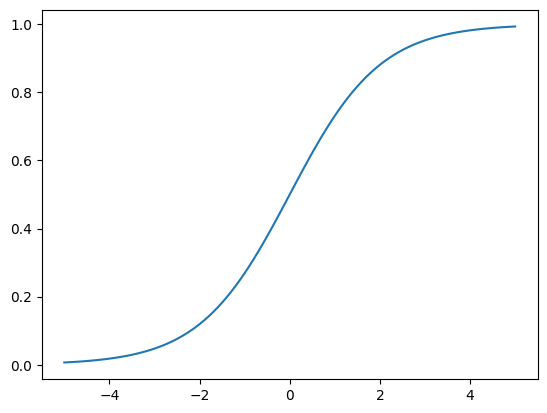

In [66]:
import torch
import matplotlib.pyplot as plt
x = torch.range(-5., 5., 0.1) 
print(x)
y = torch.sigmoid(x)
print(y)
plt.plot(x.numpy(), y.numpy())
plt.show()

从图中可以看出，sigmoid 函数饱和（即，产生极值输出）非常快，对于大多数输入。这可能成
为一个问题，因为它可能导致梯度变为零或发散到溢出的浮点值。这些现象分别被称为消失梯度
问题和爆炸梯度问题。因此，在神经网络中，除了在输出端使用 sigmoid 单元外，很少看到其他
使用 sigmoid 单元的情况，在输出端，压缩属性允许将输出解释为概率

#### Tanh

tanh 激活函数是 sigmoid 在外观上的不同变体,通过一些争论（我们留作练习），您可以确信 tanh 只是 sigmoid 的一个线性变换。当您为
tanh() 写下 PyTorch 代码并绘制曲线时，这一点也很明显。注意双曲正切,像 sigmoid,也是一
个“压缩”函数,除了它映射一个实值集合从 (-∞,+∞) 到 (-1,+1) 范围

tensor([-5.0000, -4.9000, -4.8000, -4.7000, -4.6000, -4.5000, -4.4000, -4.3000,
        -4.2000, -4.1000, -4.0000, -3.9000, -3.8000, -3.7000, -3.6000, -3.5000,
        -3.4000, -3.3000, -3.2000, -3.1000, -3.0000, -2.9000, -2.8000, -2.7000,
        -2.6000, -2.5000, -2.4000, -2.3000, -2.2000, -2.1000, -2.0000, -1.9000,
        -1.8000, -1.7000, -1.6000, -1.5000, -1.4000, -1.3000, -1.2000, -1.1000,
        -1.0000, -0.9000, -0.8000, -0.7000, -0.6000, -0.5000, -0.4000, -0.3000,
        -0.2000, -0.1000,  0.0000,  0.1000,  0.2000,  0.3000,  0.4000,  0.5000,
         0.6000,  0.7000,  0.8000,  0.9000,  1.0000,  1.1000,  1.2000,  1.3000,
         1.4000,  1.5000,  1.6000,  1.7000,  1.8000,  1.9000,  2.0000,  2.1000,
         2.2000,  2.3000,  2.4000,  2.5000,  2.6000,  2.7000,  2.8000,  2.9000,
         3.0000,  3.1000,  3.2000,  3.3000,  3.4000,  3.5000,  3.6000,  3.7000,
         3.8000,  3.9000,  4.0000,  4.1000,  4.2000,  4.3000,  4.4000,  4.5000,
         4.6000,  4.7000,  4.8000,  4.90

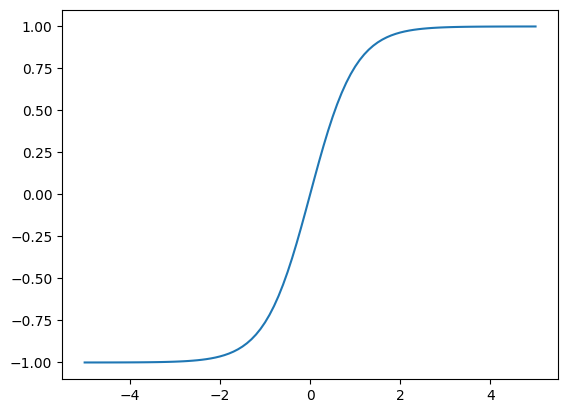

In [67]:
import torch
import matplotlib.pyplot as plt
x = torch.range(-5., 5., 0.1)
print(x)
y = torch.tanh(x)
print(y)
plt.plot(x.numpy(), y.numpy())
plt.show()

#### ReLU

ReLU（发音为 ray-luh）代表线性整流单元。这可以说是最重要的激活函数。事实上，我们可以
大胆地说，如果没有使用 ReLU，许多最近在深度学习方面的创新都是不可能实现的。对于一些
如此基础的东西来说，神经网络激活函数的出现也是令人惊讶的。它的形式也出奇的简单: 
f(x)=max(0,x) 因此，ReLU 单元所做的就是将负值裁剪为零

tensor([-5.0000, -4.9000, -4.8000, -4.7000, -4.6000, -4.5000, -4.4000, -4.3000,
        -4.2000, -4.1000, -4.0000, -3.9000, -3.8000, -3.7000, -3.6000, -3.5000,
        -3.4000, -3.3000, -3.2000, -3.1000, -3.0000, -2.9000, -2.8000, -2.7000,
        -2.6000, -2.5000, -2.4000, -2.3000, -2.2000, -2.1000, -2.0000, -1.9000,
        -1.8000, -1.7000, -1.6000, -1.5000, -1.4000, -1.3000, -1.2000, -1.1000,
        -1.0000, -0.9000, -0.8000, -0.7000, -0.6000, -0.5000, -0.4000, -0.3000,
        -0.2000, -0.1000,  0.0000,  0.1000,  0.2000,  0.3000,  0.4000,  0.5000,
         0.6000,  0.7000,  0.8000,  0.9000,  1.0000,  1.1000,  1.2000,  1.3000,
         1.4000,  1.5000,  1.6000,  1.7000,  1.8000,  1.9000,  2.0000,  2.1000,
         2.2000,  2.3000,  2.4000,  2.5000,  2.6000,  2.7000,  2.8000,  2.9000,
         3.0000,  3.1000,  3.2000,  3.3000,  3.4000,  3.5000,  3.6000,  3.7000,
         3.8000,  3.9000,  4.0000,  4.1000,  4.2000,  4.3000,  4.4000,  4.5000,
         4.6000,  4.7000,  4.8000,  4.90

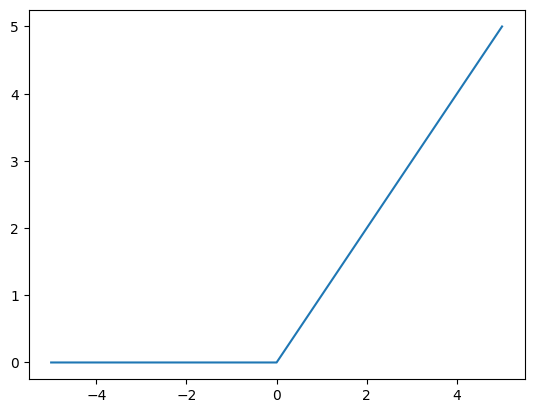

In [68]:
import torch
import matplotlib.pyplot as plt
relu = torch.nn.ReLU()
x = torch.range(-5., 5., 0.1)
print(x)
y = relu(x)
print(y)
plt.plot(x.numpy(), y.numpy())
plt.show()

ReLU 的裁剪效果有助于消除梯度问题，随着时间的推移，网络中的某些输出可能会变成零，再
也不会恢复。这就是所谓的“ReLU 死亡”问题。为了减轻这种影响，提出了 Leaky ReLU 或
Parametric ReLU （PReLU）等变体，其中泄漏系数 a 是一个可学习参数: f(x)=max(x,ax)

tensor([-5.0000, -4.9000, -4.8000, -4.7000, -4.6000, -4.5000, -4.4000, -4.3000,
        -4.2000, -4.1000, -4.0000, -3.9000, -3.8000, -3.7000, -3.6000, -3.5000,
        -3.4000, -3.3000, -3.2000, -3.1000, -3.0000, -2.9000, -2.8000, -2.7000,
        -2.6000, -2.5000, -2.4000, -2.3000, -2.2000, -2.1000, -2.0000, -1.9000,
        -1.8000, -1.7000, -1.6000, -1.5000, -1.4000, -1.3000, -1.2000, -1.1000,
        -1.0000, -0.9000, -0.8000, -0.7000, -0.6000, -0.5000, -0.4000, -0.3000,
        -0.2000, -0.1000,  0.0000,  0.1000,  0.2000,  0.3000,  0.4000,  0.5000,
         0.6000,  0.7000,  0.8000,  0.9000,  1.0000,  1.1000,  1.2000,  1.3000,
         1.4000,  1.5000,  1.6000,  1.7000,  1.8000,  1.9000,  2.0000,  2.1000,
         2.2000,  2.3000,  2.4000,  2.5000,  2.6000,  2.7000,  2.8000,  2.9000,
         3.0000,  3.1000,  3.2000,  3.3000,  3.4000,  3.5000,  3.6000,  3.7000,
         3.8000,  3.9000,  4.0000,  4.1000,  4.2000,  4.3000,  4.4000,  4.5000,
         4.6000,  4.7000,  4.8000,  4.90

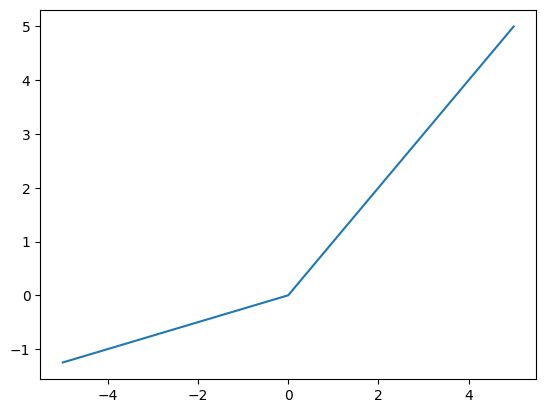

In [72]:
import torch
import matplotlib.pyplot as plt
prelu = torch.nn.PReLU(num_parameters=1)
x = torch.range(-5., 5., 0.1)
# x.require_grad = False
print(x)
y = prelu(x)
# y.require_grad = False
print(y)
plt.plot(x.detach().numpy(), y.detach().numpy())
plt.show()

#### Softmax

激活函数的另一个选择是 softmax。与 sigmoid 函数类似，softmax 函数将每个单元的输出压缩
为 0 到 1 之间。然而，softmax 操作还将每个输出除以所有输出的和，从而得到一个离散概率分
布，除以 k 个可能的类。结果分布中的概率总和为 1。这对于解释分类任务的输出非常有用，因
此这种转换通常与概率训练目标配对，例如分类交叉熵，它在“深入研究监督训练”中介绍

In [73]:
import torch.nn as nn
import torch
softmax = nn.Softmax(dim=1)
x_input = torch.randn(1, 3)
y_output = softmax(x_input)
print(x_input)
print(y_output)
print(torch.sum(y_output, dim=1))

tensor([[-2.0559,  0.2630, -0.7416]])
tensor([[0.0672, 0.6828, 0.2500]])
tensor([1.])


### 损失函数 - loss func

一个损失函数将真相（ y ）和预测（ ŷ ）作为输入,产生一个实值的分数。这个分数越高，模型的预测就越差。PyTorch 在它的 nn 包中实现了许多损失函数

#### MSELoss - 均方误差损失

回归问题的网络的输出（ ŷ ）和目标（ y ）是连续值,一个常用的损失函数的均方误差（MSE）。

MSE 就是预测值与目标值之差的平方的平均值。还有一些其他的损失函数可以用于回归问题，
例如平均绝对误差（MAE）和均方根误差（RMSE），但是它们都涉及到计算输出和目标之间的
实值距离。示例 3-6 展示了如何使用 PyTorch 实现 MSE 损失

In [74]:
import torch
import torch.nn as nn
mse_loss = nn.MSELoss()
outputs = torch.randn(3, 5, requires_grad=True)
targets = torch.randn(3, 5)
loss = mse_loss(outputs, targets)
loss

tensor(1.9754, grad_fn=<MseLossBackward>)

#### 类别交叉熵损失 - categorical cross-entropy loss

分类交叉熵损失（categorical cross-entropy loss）通常用于多类分类设置，其中输出被解释为
类隶属度概率的预测。目标（ y ）是 n 个元素的向量，表示所有类的真正多项分布。如果只有一
个类是正确的，那么这个向量就是单热向量。网络的输出（ ŷ ）也是一个向量 n 个元素,但代表
了网络的多项分布的预测。分类交叉熵将比较这两个向量（ y, ŷ ）来衡量损失:

交叉熵和它的表达式起源于信息论，但是为了本节的目的，把它看作一种计算两个分布有多不同
的方法是有帮助的。我们希望正确的类的概率接近 1，而其他类的概率接近 0。

为了正确地使用 PyTorch 的交叉熵损失，一定程度上理解网络输出、损失函数的计算方法和来
自真正表示浮点数的各种计算约束之间的关系是很重要的。具体来说，有四条信息决定了网络输
出和损失函数之间微妙的关系。首先，一个数字的大小是有限制的。其次，如果 softmax 公式
中使用的指数函数的输入是负数，则结果是一个指数小的数，如果是正数，则结果是一个指数大
的数。接下来，假定网络的输出是应用 softmax 函数之前的向量。最后,对数函数是指数函数的
倒数,和 log(exp (x)) 就等于 x 。因这四个信息,数学简化假设 指数函数和对数函数是为了更稳
定的数值计算和避免很小或很大的数字。这些简化的结果是，不使用 softmax 函数的网络输出
可以与 PyTorch 的交叉熵损失一起使用，从而优化概率分布。然后，当网络经过训练后，可以
使用 softmax 函数创建概率分布

In [76]:
import torch
import torch.nn as nn
ce_loss = nn.CrossEntropyLoss()
outputs = torch.randn(3, 5, requires_grad=True)
targets = torch.tensor([1, 0, 3], dtype=torch.int64)
loss = ce_loss(outputs, targets)
outputs, targets, loss

(tensor([[-0.2364, -0.1256,  1.1473, -1.3343,  0.0135],
         [-0.2170, -0.0795,  0.4395, -0.5752, -0.7722],
         [-0.9170, -0.1645, -0.0599,  1.7427, -1.1147]], requires_grad=True),
 tensor([1, 0, 3]),
 tensor(1.3252, grad_fn=<NllLossBackward>))

#### 二元交叉熵

我们在上一节看到的分类交叉熵损失函数在我们有多个类的分类问题中非常有用。有时，我们的
任务包括区分两个类——也称为二元分类。在这种情况下，利用二元交叉熵损失是有效的。我们
将在示例任务的“示例:对餐馆评论的情绪进行分类”中研究这个损失函数。

在示例 3-8 中，我们使用表示网络输出的随机向量上的 sigmoid 激活函数创建二进制概率输出向
量。接下来，真实情况被实例化为一个 0 和 1 的向量。最后，利用二元概率向量和基真值向量
计算二元交叉熵损失。

In [77]:
bce_loss = nn.BCELoss()
sigmoid = nn.Sigmoid()
probabilities = sigmoid(torch.randn(4, 1, requires_grad=True))
targets = torch.tensor([1, 0, 1, 0], dtype=torch.float32).view(4, 1)
loss = bce_loss(probabilities, targets)
print(probabilities)
print(loss)

tensor([[0.5734],
        [0.5158],
        [0.5663],
        [0.4483]], grad_fn=<SigmoidBackward>)
tensor(0.6112, grad_fn=<BinaryCrossEntropyBackward>)


## simple CNN

In [51]:
# 定义一个神经网络
import torch
import torch.nn as nn
import torch.nn.functional as F
class Net(nn.Module):
    def __init__(self):
     super(Net, self).__init__()
     # 1 input image channel, 6 output channels, 5x5 square convolution
     # kernel
     self.conv1 = nn.Conv2d(1, 6, 5)
     self.conv2 = nn.Conv2d(6, 16, 5)
     # an affine operation: y = Wx + b
     self.fc1 = nn.Linear(16 * 5 * 5, 120)
     self.fc2 = nn.Linear(120, 84)
     self.fc3 = nn.Linear(84, 10)
    def forward(self, x):
     # Max pooling over a (2, 2) window
     x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
     # If the size is a square you can only specify a single number
     x = F.max_pool2d(F.relu(self.conv2(x)), 2)
     x = x.view(-1, self.num_flat_features(x))
     x = F.relu(self.fc1(x))
     x = F.relu(self.fc2(x))
     x = self.fc3(x)
     return x
    def num_flat_features(self, x):
        size = x.size()[1:] # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features
net = Net()
print(net)
# 一个模型可训练的参数可以通过调用 net.parameters() 返回
params = list(net.parameters())
print(len(params))
print(params[0].size()) # conv1's .weight
# params

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)
10
torch.Size([6, 1, 5, 5])


# 优化器与损失函数

loss func - criterion

In [ ]:
# 均方误差损失 [x1 - x2]^2
import torch.nn as nn
criterion = nn.MSELoss()
loss = criterion(output, target)
import torch.optim as optim
# create your optimizer
optimizer = optim.SGD(net.parameters(), lr=0.01)
# in your training loop:
optimizer.zero_grad() # zero the gradient buffers

In [ ]:
import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

# 训练过程

## basic examples

In [ ]:
# 我们只需要在数据迭代器上循环传给网络和优化器 输入就可以
for epoch in range(2): # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data
        
        # zero the parameter gradients
        optimizer.zero_grad()
        
        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999: # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

In [48]:
torch.max(torch.tensor([0,1,2,3,4]), 0)

torch.return_types.max(
values=tensor(4),
indices=tensor(4))

## 多GPU并行加速

In [ ]:
# 你可以将模型放在一个 GPU：
device = torch.device("cuda:0")
model.to(device)

In [ ]:
# 然后，你可以复制所有的张量到 GPU：
mytensor = my_tensor.to(device)

In [ ]:
# 通过使用 DataParallel 让你的模型并行运行
model = nn.DataParallel(model)

### A example

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
input_size = 5
output_size = 2
batch_size = 30
data_size = 100
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
# 生成一个玩具数据。你只需要实现 getitem.
class RandomDataset(Dataset):
    def __init__(self, size, length):
        self.len = length
        self.data = torch.randn(length, size)
    def __getitem__(self, index):
        return self.data[index]
    def __len__(self):
        return self.len
rand_loader = DataLoader(dataset=RandomDataset(input_size, data_size),batch_size=batch_size, shuffle=True)

为了做一个小 demo，我们的模型只是获得一个输入，执行一个线性操作，然后给一个输出。尽管
如此，你可以使用 DataParallel 在任何模型(CNN, RNN, Capsule Net 等等.)

In [ ]:
class Model(nn.Module):
    # Our model
    def __init__(self, input_size, output_size):
        super(Model, self).__init__()
        self.fc = nn.Linear(input_size, output_size)
    def forward(self, input):
        output = self.fc(input)
        print("\tIn Model: input size", input.size(),
            "output size", output.size())
        return output

核心。首先我们需要一个模型的实例，然后验证我们是否有多个 GPU。如果我们
有多个 GPU，我们可以用 nn.DataParallel 来 包裹 我们的模型。然后我们使用 model.to(device)
把模型放到多 GPU 中。

In [ ]:
model = Model(input_size, output_size)
if torch.cuda.device_count() > 1:
    print("Let's use", torch.cuda.device_count(), "GPUs!")
    # dim = 0 [30, xxx] -> [10, ...], [10, ...], [10, ...] on 3 GPUs
    model = nn.DataParallel(model)
model.to(device)

In [ ]:
# 运行模型： 现在我们可以看到输入和输出张量的大小了
for data in rand_loader:
    input = data.to(device)
    output = model(input)
    print("Outside: input size", input.size(),
    "output_size", output.size())

数据并行自动拆分了你的数据并且将任务单发送到多个 GPU 上。当每一个模型都完成自己的任务
之后，DataParallel 收集并且合并这些结果，然后再返回给你

## argparse

我们常常可以把argparse的使用简化成下面四个步骤

1：import argparse

2：parser = argparse.ArgumentParser()

3：parser.add_argument()

4：parser.parse_args()

上面四个步骤解释如下：首先导入该模块；然后创建一个解析对象；然后向该对象中添加你要关注的命令行参数和选项，每一个add_argument方法对应一个你要关注的参数或选项；最后调用parse_args()方法进行解析；解析成功之后即可使用。


1-引入模块
import argparse

2-建立解析对象
parser = argparse.ArgumentParser()

3-增加属性：给xx实例增加一个aa属性 # xx.add_argument(“aa”)
parser.add_argument(“echo”)

4-属性给与args实例： 把parser中设置的所有"add_argument"给返回到args子类实例当中， 那么parser中增加的属性内容都会在args实例中，使用即可。
args = parser.parse_args()

在 add_argument 前，给属性名之前加上“- -”，就能将之变为可选参数。
parser.add_argument("–bool",help = “Whether to pirnt sth.”)

In [ ]:
import argparse

parser = argparse.ArgumentParser(description='命令行中传入一个数字')
#type是要传入的参数的数据类型  help是该参数的提示信息
parser.add_argument('integers', type=str, help='传入的数字')

args = parser.parse_args()

#获得传入的参数
print(args)

In [ ]:
# 例子：
import argparse
parser = argparse.ArgumentParser()

parser.add_argument("--model_name_or_path", default=None, type=str, required=True, help="Path to pre-trained model or shortcut name selected in the list: " + ", ".join(list(NeZhaTokenizer.pretrained_init_configuration.keys())))
parser.add_argument("--init_checkpoint_path", default=None, type=str, required=True, help="The model checkpoint path.", )
parser.add_argument("--max_seq_length", default=128, type=int, help="The maximum total input sequence length after tokenization. Sequences longer " "than this will be truncated, sequences shorter will be padded.", )
parser.add_argument("--batch_size", default=8, type=int, help="Batch size per GPU/CPU for training.", )
parser.add_argument("--device", default="gpu", type=str, choices=["cpu", "gpu", "xpu"], help="The device to select to train the model, is must be cpu/gpu/xpu.")

## tensorboard可视化

复制文件logger.py至自己的项目目录下
在项目下建立tensorboard文件夹，存放可视化训练过程中产生的中间文件。
在代码中声明tf_logger = Logger(os.path.join(sys.path[0]+'/tensorboard/'))，记录需要可视化的数据。

In [ ]:
# set tf logger for tensorboard
tf_logger = Logger(os.path.join(sys.path[0]+'/tensorboard/'))
# train
for step, (x, y) in enumerate(dataset, start=1):
   x, y = x.to(device), y.to(device)
   predict, loss = model(x)
   accs = cal_accuracy(predict, y)
   if step % 10 == 0:
        print('step:{0}\ttraining acc:{1}'.format(step, accs))
   # tensorboard
   tf_logger.scalar_summary("accs", accs, step)
   tf_logger.scalar_summary("loss", loss, step)

In [ ]:
#在当前目录下输入以下命令，启动tensorboard：
tensorboard --logdir='./tensorboard' --port='6006'
pip show tensorflow
# 根据pip show tensorflow显示的安装路径，进入tensorboard安装目录
cd /anaconda3/lib/python3.6/site-packages/tensorboard
# 在tensorboard安装目录下输入以下命令,注意--logdir对应的是tensorboard文件夹的绝对路径
python main.py --logdir='/Users/xuawai/demo/tensorboard' --port=6006
# 浏览器打开http://localhost:6006，即实现可视化的训练过程

https://github.com/lanpa/tensorboardX

# full code examples

## A perceptron example

In [ ]:
import torch.nn as nn
import torch.optim as optim
input_dim = 2
lr = 0.001
perceptron = Perceptron(input_dim=input_dim)
bce_loss = nn.BCELoss()
optimizer = optim.Adam(params=perceptron.parameters(), lr=lr)

In [ ]:
# each epoch is a complete pass over the training data
for epoch_i in range(n_epochs):
    # the inner loop is over the batches in the dataset
    for batch_i in range(n_batches):
        # Step 0: Get the data
        x_data, y_target = get_toy_data(batch_size)
        
        # Step 1: Clear the gradients
        perceptron.zero_grad()
        
        # Step 2: Compute the forward pass of the model
        y_pred = perceptron(x_data, apply_sigmoid=True)
        
        # Step 3: Compute the loss value that we wish to optimize
        loss = bce_loss(y_pred, y_target)
        
        # Step 4: Propagate the loss signal backward
        loss.backward()
        
        # Step 5: Trigger the optimizer to perform one update
        optimizer.step()

## A simple CNN example

model - net的骨架

In [29]:
# 定义一个神经网络
import torch
import torch.nn as nn
import torch.nn.functional as F
class Net(nn.Module):
    def __init__(self):
     super(Net, self).__init__()
     # 1 input image channel, 6 output channels, 5x5 square convolution
     # kernel
     self.conv1 = nn.Conv2d(1, 6, 5)
     self.conv2 = nn.Conv2d(6, 16, 5)
     # an affine operation: y = Wx + b
     self.fc1 = nn.Linear(16 * 5 * 5, 120)
     self.fc2 = nn.Linear(120, 84)
     self.fc3 = nn.Linear(84, 10)
    def forward(self, x):
     # Max pooling over a (2, 2) window
     x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
     # If the size is a square you can only specify a single number
     x = F.max_pool2d(F.relu(self.conv2(x)), 2)
     x = x.view(-1, self.num_flat_features(x))
     x = F.relu(self.fc1(x))
     x = F.relu(self.fc2(x))
     x = self.fc3(x)
     return x
    def num_flat_features(self, x):
        size = x.size()[1:] # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features
net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [33]:
# 一个模型可训练的参数可以通过调用 net.parameters() 返回
params = list(net.parameters())
print(len(params))
print(params[0].size()) # conv1's .weight
params

10
torch.Size([6, 1, 5, 5])


[Parameter containing:
 tensor([[[[ 0.0996, -0.0557,  0.0052, -0.0816,  0.1134],
           [ 0.0962,  0.1220, -0.0785,  0.1977,  0.0010],
           [-0.0507, -0.1835,  0.1355, -0.1758, -0.1291],
           [-0.0680,  0.0743,  0.0784,  0.1321,  0.0086],
           [ 0.0975,  0.1316, -0.1912, -0.1675, -0.1931]]],
 
 
         [[[-0.1415,  0.0997,  0.1780,  0.0695, -0.1546],
           [ 0.0968,  0.1124,  0.1778, -0.1819, -0.0287],
           [-0.1029,  0.1745,  0.1114,  0.0242,  0.0125],
           [ 0.0853, -0.1570, -0.0202, -0.1498,  0.0714],
           [ 0.0620, -0.1740, -0.0086,  0.0928,  0.1008]]],
 
 
         [[[ 0.1887, -0.1803, -0.0623, -0.0818, -0.1691],
           [-0.1909, -0.1474,  0.0930, -0.1706, -0.0915],
           [-0.1338, -0.1539,  0.1806, -0.0213, -0.0667],
           [ 0.1823, -0.1154, -0.0847, -0.0651, -0.1340],
           [-0.0957, -0.0482,  0.0149, -0.1177, -0.0078]]],
 
 
         [[[ 0.1970,  0.0032, -0.0234, -0.1969, -0.1457],
           [ 0.1019,  0.1198, -

forward and backward - 计算前向与反向

In [42]:
# 处理输入以及调用反向传播
# 构造一个32x32的图片
input = torch.randn(1, 1, 32, 32)
out = net(input)
input, out

(tensor([[[[-1.9115,  0.1579,  1.8790,  ..., -0.1904,  0.3316, -2.4521],
           [ 0.0132, -1.3547,  1.5303,  ..., -0.7823,  0.8112, -1.6053],
           [-0.8446,  0.0844,  0.1581,  ...,  1.2818, -0.3657, -1.0858],
           ...,
           [-0.0806,  0.6282, -0.4321,  ..., -0.0446,  0.7562,  1.3624],
           [-0.1886,  0.6614,  0.5811,  ...,  1.0338, -1.3316,  1.0004],
           [ 1.8234, -0.2151, -0.5465,  ..., -0.6707, -0.8876, -1.9857]]]]),
 tensor([[ 0.1801, -0.0021, -0.1334,  0.0949, -0.1400,  0.1043,  0.0637,  0.1220,
          -0.0466, -0.1790]], grad_fn=<AddmmBackward>))

In [35]:
# 把所有参数梯度缓存器置零，用随机的梯度来反向传播
net.zero_grad()
out.backward(torch.randn(1, 10))

Loss func - 损失函数 - 接在模型最后的一个函数，最终目标

In [37]:
# 一个损失函数需要一对输入：模型输出和目标，然后计算一个值来评估输出距离目标有多远。有一些不同的损失函数在 nn 包中。一个简单的损失函数就是 nn.MSELoss ，这计算了均方误差
output = net(input)
target = torch.randn(10) # a dummy target, for example
target = target.view(1, -1) # make it the same shape as output
criterion = nn.MSELoss()
loss = criterion(output, target)
output, target, loss

(tensor([[ 0.1845,  0.0105, -0.1095,  0.0512, -0.1492,  0.0839,  0.0707,  0.1235,
          -0.0293, -0.1872]], grad_fn=<AddmmBackward>),
 tensor([[-0.3960, -0.7341, -0.0348, -2.0091, -0.2997, -0.6403, -0.5333, -0.2196,
          -0.3291,  0.5543]]),
 tensor(0.6811, grad_fn=<MseLossBackward>))

In [43]:
print(loss.grad_fn) # MSELoss
print(loss.grad_fn.next_functions[0][0]) # Linear
print(loss.grad_fn.next_functions[0][0].next_functions[0][0]) # ReLU

In [44]:
# 们调用 loss.backward() ，然后看一下 con1 的偏置项在反向传播之前和之后的变化
net.zero_grad() # zeroes the gradient buffers of all parameters
print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)
loss.backward()
print('conv1.bias.grad after backward')
print(net.conv1.bias.grad)

conv1.bias.grad before backward
tensor([0., 0., 0., 0., 0., 0.])
conv1.bias.grad after backward
tensor([ 0.0289, -0.0077,  0.0164,  0.0020,  0.0086,  0.0045])


优化器 - 更新网络参数 - weight = weight - learning_rate * gradient 

In [45]:
import torch.optim as optim
# create your optimizer
optimizer = optim.SGD(net.parameters(), lr=0.01)
# in your training loop:
optimizer.zero_grad() # zero the gradient buffers
output = net(input)
loss = criterion(output, target)
loss.backward()
optimizer.step() # Does the update

## A example of 小试牛刀

### 手动使用矩阵实现神经网络

可以很容易地使用NumPy，手动实现网络的 前向和反向传播，来拟合随机数据

In [56]:
# -*- coding: utf-8 -*-
import numpy as np
# N是批量大小; D_in是输入维度;
# 49/5000 H是隐藏的维度; D_out是输出维度。
N, D_in, H, D_out = 64, 1000, 100, 10

# 创建随机输入和输出数据
x = np.random.randn(N, D_in)
print(x.shape)
y = np.random.randn(N, D_out)
print(y.shape)

# 随机初始化权重
w1 = np.random.randn(D_in, H)
print(w1.shape)
w2 = np.random.randn(H, D_out)
print(w2.shape)

learning_rate = 1e-6
for t in range(500):
    # 前向传递：计算预测值y
    h = x.dot(w1) # hidden = x * w1
    h_relu = np.maximum(h, 0)
    y_pred = h_relu.dot(w2)
    
    # 计算和打印损失loss
    loss = np.square(y_pred - y).sum()
    if t %100 == 0:
        print('epoch :',t,'loss :', loss)
    
    # 反向传播，计算w1和w2对loss的梯度
    grad_y_pred = 2.0 * (y_pred - y)
    grad_w2 = h_relu.T.dot(grad_y_pred)
    grad_h_relu = grad_y_pred.dot(w2.T)
    grad_h = grad_h_relu.copy()
    grad_h[h < 0] = 0
    grad_w1 = x.T.dot(grad_h)
    
    # 更新权重
    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2

(64, 1000)
(64, 10)
(1000, 100)
(100, 10)
epoch : 0 loss : 28412498.620844334
epoch : 100 loss : 334.2850432520746
epoch : 200 loss : 1.0393189411545993
epoch : 300 loss : 0.004481854144799527
epoch : 400 loss : 2.4336003569898868e-05


与Numpy不同，PyTorch可以利用GPU加速其数值计算。要在GPU上运行Tensor,在构造张量使用device 参数把tensor建立在GPU上

In [57]:
# -*- coding: utf-8 -*-
# 一个用tensor手算的例子
import torch
dtype = torch.float
device = torch.device("cpu")
# device = torch.device（“cuda：0”）＃取消注释以在GPU上运行

# N是批量大小; D_in是输入维度;
# H是隐藏的维度; D_out是输出维度。
N, D_in, H, D_out = 64, 1000, 100, 10

#创建随机输入和输出数据
x = torch.randn(N, D_in, device=device, dtype=dtype)
print(x.shape)
y = torch.randn(N, D_out, device=device, dtype=dtype)
print(y.shape)

# 随机初始化权重
w1 = torch.randn(D_in, H, device=device, dtype=dtype)
print(w1.shape)
w2 = torch.randn(H, D_out, device=device, dtype=dtype)
print(w2.shape)

learning_rate = 1e-6
for t in range(500):
    # 前向传递：计算预测y
    h = x.mm(w1)
    h_relu = h.clamp(min=0)
    y_pred = h_relu.mm(w2)
    
    # 计算和打印损失
    loss = (y_pred - y).pow(2).sum().item()
    if t %100 == 0:
        print('epoch :',t,'loss :', loss)
    
    # Backprop计算w1和w2相对于损耗的梯度
    grad_y_pred = 2.0 * (y_pred - y)
    grad_w2 = h_relu.t().mm(grad_y_pred)
    grad_h_relu = grad_y_pred.mm(w2.t())
    grad_h = grad_h_relu.clone()
    grad_h[h < 0] = 0
    grad_w1 = x.t().mm(grad_h)
    
    # 使用梯度下降更新权重
    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2

torch.Size([64, 1000])
torch.Size([64, 10])
torch.Size([1000, 100])
torch.Size([100, 10])
epoch : 0 loss : 27904286.0
epoch : 100 loss : 334.3866271972656
epoch : 200 loss : 1.0009766817092896
epoch : 300 loss : 0.007415931671857834
epoch : 400 loss : 0.00024159473832696676


### 用autograd方法实现神经网络

当使用autograd时，网络前向传播将定义一个计算图；图中的节点是tensor，边是函数，这些函数是输出tensor到输入
tensor的映射。这张计算图使得在网络中反向传播时梯度的计算十分简单。

这听起来很复杂，在实践中使用起来非常简单。 如果我们想计算某些的tensor的梯度，我们只需
要在建立这个tensor时加入这么一句： requires_grad=True 。这个tensor上的任何PyTorch的操作
都将构造一个计算图，从而允许我们稍后在图中执行反向传播。如果这个 tensor x 的
requires_grad=True ，那么反向传播之后 x.grad 将会是另一个张量，其为x关于某个标量值的梯
度。

有时可能希望防止PyTorch在 requires_grad=True 的张量执行某些操作时构建计算图；例如，在
训练神经网络时，我们通常不希望通过权重更新步骤进行反向传播。在这种情况下，我们可以使
用 torch.no_grad() 上下文管理器来防止构造计算图

In [60]:
# -*- coding: utf-8 -*-
import torch
dtype = torch.float
device = torch.device("cpu")
# device = torch.device（“cuda：0”）＃取消注释以在GPU上运行

# N是批量大小; D_in是输入维度;
# H是隐藏的维度; D_out是输出维度。
N, D_in, H, D_out = 64, 1000, 100, 10

# 创建随机Tensors以保持输入和输出。
# 设置requires_grad = False表示我们不需要计算渐变
# 在向后传球期间对于这些Tensors。 x = torch.randn(N, D_in, device=device, dtype=dtype) y = torch.randn(N, D_out, device=device, dtype=dtype)
# 为权重创建随机Tensors。
# 设置requires_grad = True表示我们想要计算渐变
# 在向后传球期间尊重这些张贴。
w1 = torch.randn(D_in, H, device=device, dtype=dtype, requires_grad=True)
w2 = torch.randn(H, D_out, device=device, dtype=dtype, requires_grad=True)

learning_rate = 1e-6
for t in range(500):
    # 前向传播：使用tensors上的操作计算预测值y; 
    # 由于w1和w2有requires_grad=True，涉及这些张量的操作将让PyTorch构建计算图，
    # 从而允许自动计算梯度。由于我们不再手工实现反向传播，所以不需要保留中间值的引用
    y_pred = x.mm(w1).clamp(min=0).mm(w2)
    
    # 使用Tensors上的操作计算和打印丢失。
    # loss是一个形状为()的张量
    # loss.item() 得到这个张量对应的python数值
    loss = (y_pred - y).pow(2).sum()
    if t %100 == 0:
        print('epoch :',t,'loss :', loss.item())
    # 使用autograd计算反向传播。这个调用将计算loss对所有requires_grad=True的tensor的梯度。
    # 这次调用后，w1.grad和w2.grad将分别是loss对w1和w2的梯度张量。
    loss.backward()
    
    # 使用梯度下降更新权重。对于这一步，我们只想对w1和w2的值进行原地改变；不想为更新阶段构建计算图，
    # 所以我们使用torch.no_grad()上下文管理器防止PyTorch为更新构建计算图
    with torch.no_grad():
        w1 -= learning_rate * w1.grad
        w2 -= learning_rate * w2.grad
    
        # 反向传播后手动将梯度设置为零
        w1.grad.zero_()
        w2.grad.zero_()

epoch : 0 loss : 30318530.0
epoch : 100 loss : 203.52279663085938
epoch : 200 loss : 0.22632035613059998
epoch : 300 loss : 0.0006550506222993135
epoch : 400 loss : 4.042639920953661e-05


@staticmethod 

当某个方法不需要用到对象中的任何资源,将这个方法改为一个静态方法, 加一个@staticmethod

加上之后, 这个方法就和普通的函数没有什么区别了, 只不过写在了一个类中, 可以使用这个类的对象调用,

也可以使用类直接调用, 简而言之, 写在类中的函数

In [78]:
# 这个例子中，我们自定义一个自动求导函数来展示ReLU的非线性。并用它实现我们的两层网络
import torch
class MyReLU(torch.autograd.Function):
    """
    我们可以通过建立torch.autograd的子类来实现我们自定义的autograd函数，
    并完成张量的正向和反向传播。
    """
    @staticmethod  #静态方法 类或实例均可调用，函数前加上@property，使得该函数可直接调用，封装起来
    def forward(ctx, x):
        """
        在正向传播中，我们接收到一个上下文对象和一个包含输入的张量；
        我们必须返回一个包含输出的张量，
        并且我们可以使用上下文对象来缓存对象，以便在反向传播中使用。
        """
        ctx.save_for_backward(x)
        return x.clamp(min=0)
    
    @staticmethod # 这样封装后就可以直接MyReLu.backward()调用，不用实例化，也不用写self进去
    def backward(ctx, grad_output):
        """
        在反向传播中，我们接收到上下文对象和一个张量，
        其包含了相对于正向传播过程中产生的输出的损失的梯度。
        我们可以从上下文对象中检索缓存的数据，
        并且必须计算并返回与正向传播的输入相关的损失的梯度。
        """
        x, = ctx.saved_tensors
        grad_x = grad_output.clone()
        grad_x[x < 0] = 0
        return grad_x
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# N是批大小； D_in 是输入维度；
# H 是隐藏层维度； D_out 是输出维度
N, D_in, H, D_out = 64, 1000, 100, 10
# 产生输入和输出的随机张量
x = torch.randn(N, D_in, device=device)
y = torch.randn(N, D_out, device=device)
# 产生随机权重的张量
w1 = torch.randn(D_in, H, device=device, requires_grad=True)
w2 = torch.randn(H, D_out, device=device, requires_grad=True)
learning_rate = 1e-6
for t in range(500):
    # 正向传播：使用张量上的操作来计算输出值y；
    # 我们通过调用 MyReLU.apply 函数来使用自定义的ReLU
    y_pred = MyReLU.apply(x.mm(w1)).mm(w2)
    # 计算并输出loss
    loss = (y_pred - y).pow(2).sum()
    if t %100 == 0:
        print('epoch :',t,'loss :', loss.item())
    # 使用autograd计算反向传播过程。
    loss.backward()
    with torch.no_grad():
        # 用梯度下降更新权重
        w1 -= learning_rate * w1.grad
        w2 -= learning_rate * w2.grad
        # 在反向传播之后手动清零梯度
        w1.grad.zero_()
        w2.grad.zero_()

epoch : 0 loss : 23061838.0
epoch : 100 loss : 229.37933349609375
epoch : 200 loss : 0.7874122858047485
epoch : 300 loss : 0.006595850922167301
epoch : 400 loss : 0.00021584687056019902
